<a href="https://colab.research.google.com/github/JaredMorgan21/Gesture-Recognition/blob/main/GestureRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## upload library from kaggle
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

## create dataset
! kaggle datasets download -d gti-upm/leapgestrecog
! mkdir train
! unzip leapgestrecog.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: train/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: train/leapgestrecog/leapGestRecog/

In [3]:
! mkdir test
! mv train/leapGestRecog/09 test

! mkdir train/dataset
! rsync -a train/leapGestRecog/00/* train/dataset
! rsync -a train/leapGestRecog/01/ train/dataset/
! rsync -a train/leapGestRecog/02/ train/dataset/
! rsync -a train/leapGestRecog/03/ train/dataset/
! rsync -a train/leapGestRecog/04/ train/dataset/
! rsync -a train/leapGestRecog/05/ train/dataset/
! rsync -a train/leapGestRecog/06/ train/dataset/
! rsync -a train/leapGestRecog/07/ train/dataset/
! rsync -a train/leapGestRecog/08/ train/dataset/

In [4]:
## import libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable

In [5]:
print(torch.__version__)

2.2.1+cu121


In [6]:
args={}
kwargs={}
args['batch_size']=32
args['test_batch_size']=32
args['epochs']=1  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=True #if the computer has a GPU, type True, otherwise, False

In [7]:
## transformations
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])

## download and load training dataset
trainset = datasets.ImageFolder('train/dataset', transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=args['batch_size'], shuffle=True, **kwargs)

## download and load testing dataset
testset = datasets.ImageFolder('test/09', transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=args['test_batch_size'], shuffle=True, **kwargs)

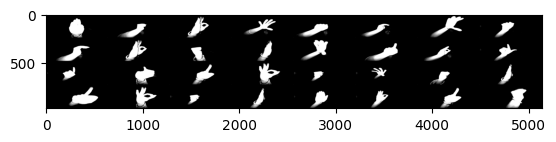

In [8]:
## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))